<img width="300px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/1280px-Julia_prog_language.svg.png">

# What's new in Julia

## Julia Resources
- https://julialang.org
- https://pkg.julialang.org/ (finding packages)
- https://discourse.julialang.org (ask for help)
- http://julialang.slack.com/ (ask for help, typically faster response than Discourse)
- https://docs.julialang.org/en/ (documentation)

---

## First: Why does Julia exist?

- Do we need another language?

### Sapir-Worf Hypothesis (https://en.wikipedia.org/wiki/Linguistic_relativity)

- Your language influences/determines how you think
- How you solve problems is influenced by your tools

e.g. avoid loops in R/Python

### The Two-Language Problem

- Write prototype code in an easy language (Python)
- Write production code in a fast language (Scala)

### Julia's claims are:

1. Julia is less restrictive to how you solve problems
2. Julia solves the two-language problem

### Features

**Julia is fast because of this set of features.  There's no magic dust you can go sprinkle on python.**

- Type system
- Multiple dispatch
- Type Inference
- Metaprogramming (macros)
- Just-in-time (JIT) compilation using LLVM
- Clean, familiar syntax
- Most of Julia is written in Julia

### Micro Benchmarks

These micro-benchmarks, while not comprehensive, do test compiler performance on a range of common code patterns, such as function calls, string parsing, sorting, numerical loops, random number generation, recursion, and array operations.

![](https://julialang.org/images/benchmarks.svg)

---

## How does Julia work?

### JIT

In [1]:
using Random

x = randn(100)

@time sum(x)  # compile, then run

  0.025898 seconds (93.20 k allocations: 4.829 MiB, 13.74% gc time)


3.7972691307265762

In [2]:
@time sum(x)  # call compiled function

  0.000002 seconds (5 allocations: 176 bytes)


3.7972691307265762

### Type System/Multiple Dispatch

In [3]:
f(x) = 0  # same as f(x::Any)
f(x::Int) = 1
f(x::Number) = 2

f (generic function with 3 methods)

In [4]:
f(1)

1

In [5]:
f(1.0), f(Float32(1.0))

(2, 2)

In [6]:
f("hi")

0

### Generic functions specialize to argument types!

In [7]:
@code_llvm f("hi")


;  @ In[3]:1 within `f'
define i64 @julia_f_16504(%jl_value_t addrspace(10)* nonnull) {
top:
  ret i64 0
}


#### For types, think set theory

In [8]:
using GraphRecipes
using Plots
using Interact
gr(size=(800, 800))

@manipulate for T in [Int64, Signed, Integer, Real, Number]
    plot(T, nodeshape=:circle, nodesize=3, method=:tree)
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14287310397723067492\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2352079602464161852\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14287310397723067492\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["T"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "Int64","val" => 1,"id" => "idqrsGIi3g"), OrderedDict{String,Any}("key" => "Signed","val" => 2,"id" => "id5bYmwnmT"), OrderedDict{String,Any}("key" => "Integer","val" => 3,"id" => "idE2XTgs5O"), OrderedDict{String,Any}("key" => "Real","val" => 4,"id" => "idrlHHCD9I"), OrderedDict{String,Any}("key" => "Number","val" => 5,"id" => "id9y81aOYs")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/joday/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000120c21f90, Task (runnable) @0x0000000120c21f90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                eleme

### Metaprogramming (Macros)

- Functions of **expressions**
- You can change the expression to whatever you want inside of a macro

In [9]:
x = 10

10

In [10]:
show(x)

10

In [11]:
@show x + 5;

x + 5 = 15


### The best macro: `@time`

In [12]:
using BenchmarkTools

function f2(n)
    x = 0.0
    for i in 1:n
        x += sum(randn(1000, 1000))
    end
    x
end

@time f2(200)

  1.713147 seconds (106.17 k allocations: 1.496 GiB, 11.15% gc time)


11067.81539163798

### Usefulness of Multiple Dispatch

Newton's method for finding the root of a function (where $f(\theta) = 0$):

$$
\theta_{t+1} = \theta_t - \frac{F(\theta_t)}{F'(\theta_t)}
$$

Quantile finder for continuous univariate distributions

- Want to find $\theta$ such that $F(\theta) = q$ for cumulative distribution function $F$ and quantile $0<q<1$.

In [13]:
using Distributions

function my_quantile(d, q)
    θ = mean(d)
    for i in 1:20
        θ -= (cdf(d, θ) - q) / pdf(d, θ)
    end
    θ
end

my_quantile (generic function with 1 method)

In [14]:
for q in [.1, .5, .9]
    @show my_quantile(Normal(), q)
end

my_quantile(Normal(), q) = -1.2815515655446004
my_quantile(Normal(), q) = 0.0
my_quantile(Normal(), q) = 1.2815515655446006


In [15]:
for q in [.1, .5, .9]
    @show my_quantile(Uniform(), q)
end

my_quantile(Uniform(), q) = 0.1
my_quantile(Uniform(), q) = 0.5
my_quantile(Uniform(), q) = 0.9


## Fused Broadcasting

- Note: Broadcasting must be explicit

In [16]:
x = rand(2, 2)

cos.(sin.(abs.(x))) == map(x -> cos(sin(abs(x))), x)

@. cos(sin(abs(x)))

2×2 Array{Float64,2}:
 0.802294  0.850538
 0.944114  0.715511

--- 

# Interop

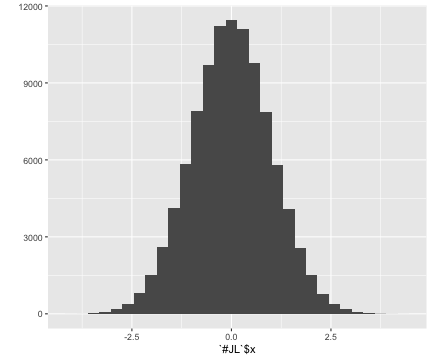

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/joday/.julia/packages/RCall/g7dhB/src/io.jl:113


In [17]:
using RCall

x = randn(10^5)

R"""
library(ggplot2); qplot($x)
"""

In [18]:
using PyCall

@pyimport numpy.random as nr

nr.rand(3, 4)

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/joday/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407


3×4 Array{Float64,2}:
 0.558475  0.160118  0.583945  0.537891 
 0.299217  0.412063  0.67625   0.0994379
 0.373033  0.680545  0.179127  0.840938 

---

# REPL Modes

- `?` (Help)
- `;` (Shell)
- `]` (Pkg)
- `$` (RCall)

---

# State of the Art Packages in Julia 1.0 (although we're now at 1.2)

http://www.stochasticlifestyle.com/some-state-of-the-art-packages-in-julia-v1-0/



## DifferentialEquations.jl

- State-of-the-art differential equation solvers

![](https://camo.githubusercontent.com/011fe73b3a9c48dd7c36c0a5f31d2b37d8d55162/687474703a2f2f7777772e73746f636861737469636c6966657374796c652e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031392f30382f64655f736f6c7665725f736f6674776172655f636f6d70617273696f6e2d312e706e67)

In [19]:
using Flux

# Flux.jl

- Deep Neural Networks in pure Julia

```julia
model = Chain(
  Dense(768, 128, σ),
  LSTM(128, 256),
  LSTM(256, 128),
  Dense(128, 10),
  softmax)

loss(x, y) = crossentropy(model(x), y)

Flux.train!(loss, data, ADAM(...))
```

## Zygote.jl

- Automatic differentiation for arbitrary Julia code
- This is a fairly big deal for deep learning applications

In [20]:
using Zygote

thing(x) = 5x + 3

thing(10), thing'(10)

(53, 5)

# MLJ.jl

- Big ML Framework in Julia.  Wrapper around SciKitLearn.jl and more

In [21]:
using MLJ
models()

┌ Info: Recompiling stale cache file /Users/joday/.julia/compiled/v1.2/MLJ/rAU56.ji for MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1240


Dict{Any,Any} with 9 entries:
  "MultivariateStats" => Any["RidgeRegressor", "PCA"]
  "MLJ"               => Any["ConstantClassifier", "Standardizer", "SimpleRidge…
  "DecisionTree"      => Any["DecisionTreeRegressor", "DecisionTreeClassifier"]
  "ScikitLearn"       => Any["SVMLRegressor", "SVMNuClassifier", "ElasticNet", …
  "LIBSVM"            => Any["EpsilonSVR", "LinearSVC", "NuSVR", "NuSVC", "SVC"…
  "Clustering"        => Any["KMeans", "KMedoids"]
  "GLM"               => Any["OLSRegressor", "GLMCountRegressor"]
  "NaiveBayes"        => Any["GaussianNBClassifier", "MultinomialNBClassifier"]
  "XGBoost"           => Any["XGBoostCount", "XGBoostRegressor", "XGBoostClassi…

## Interact.jl

- Interactive widgets for Julia

In [22]:
using Interact, Plots, Random
gr(size=(800, 500))

@manipulate for i in 1:50, color in [:black, :blue, :green, :red], lw in 1:.2:10
    Random.seed!(123)
    scatter(rand(i), alpha = i/50, ylim=(0,1), xlim=(0,50), color=color)
    plot!(sin, 0, i, color=color, linewidth=lw)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/joday/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000120c21690, Task (runnable) @0x0000000120c21690), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\

## Packages working together with no glue code!

- Taxi trip records for every yellow Taxi in NYC in 2018
    - 10.43 GB
    - ~112 Million Rows
    - https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq/data
- **Pandas took 165 seconds to load the table into memory.**

 48.135588 seconds (452.27 M allocations: 16.890 GiB, 9.49% gc time)


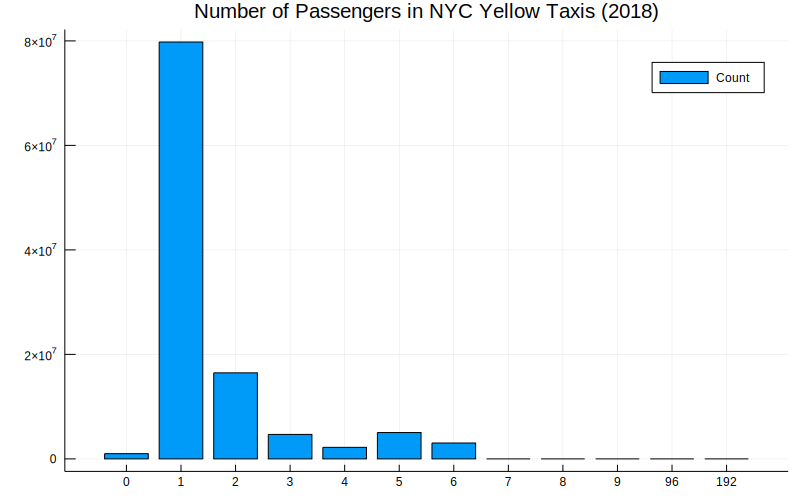

In [23]:
using Plots, OnlineStats, CSV, Parsers

o = CountMap(Int)

path = "/Users/joday/datasets/2018_Yellow_Taxi_Trip_data.csv"

@time for row in CSV.Rows(path; reusebuffer=true)
    fit!(o, Parsers.parse(Int, row.passenger_count))
end

sort!(o.value)
plot(o, title="Number of Passengers in NYC Yellow Taxis (2018)")

# What's new?

## Missing

In [24]:
missing

missing

In [25]:
sum([1, missing, 3])

missing

In [26]:
sum(skipmissing([1, missing, 3]))

4

## Package Manager, `Pkg`

Based on two files: 

1. `Project.toml` - List of dependencies
2. `Manifest.toml` - List of exact package versions installed

Replicate an environment exactly by simply sharing your `Manifest.toml` file

In [27]:
using Pkg

Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [77b51b56] AverageShiftedHistograms v0.8.1
  [6e4b80f9] BenchmarkTools v0.4.2
  [336ed68f] CSV v0.5.11
  [a93c6f00] DataFrames v0.19.3
  [31c24e10] Distributions v0.21.1
  [587475ba] Flux v0.9.0
  [bd48cda9] GraphRecipes v0.4.0
  [7073ff75] IJulia v1.20.0
  [6deec6e2] IndexedTables v0.12.2
  [c601a237] Interact v0.10.3
  [d3863d7c] InteractBase v0.10.3
  [a93385a2] JuliaDB v0.12.0
  [30fc2ffe] LossFunctions v0.5.1+ [`~/.julia/dev/LossFunctions`]
  [add582a8] MLJ v0.2.3
  [a15396b6] OnlineStats v0.23.0
  [925886fa] OnlineStatsBase v0.10.2
  [bac558e1] OrderedCollections v1.1.0
  [69de0a69] Parsers v0.3.7
  [91a5bcdd] Plots v0.26.2
  [92933f4c] ProgressMeter v1.0.0
  [438e738f] PyCall v1.91.2
  [6f49c342] RCall v0.13.4
  [3cdcf5f2] RecipesBase v0.7.0
  [2913bbd2] StatsBase v0.32.0
  [f3b207a7] StatsPlots v0.10.2
  [0f1e0344] WebIO v0.8.11
  [e88e6eb3] Zygote v0.3.4


# Named Tuples

In [28]:
(x=1, y=2)

(x = 1,
 y = 2,)

# Generators

- Lazily map a function/filter to a collection

In [29]:
x = randn(10^7)

g = (xi^2 for xi in x if xi > 0)

mean(g)

0.9998229684236556

# Composable (parallel tasks that call other parallel tasks) Multi-threading!

- Partially supported in 1.2.  Full support coming in 1.3!

https://julialang.org/blog/2019/07/multithreading

In [37]:
# Jupyter isn't picking up my JULIA_NUM_THREADS environmental variable for some reason

Threads.@threads for i = 1:10
    println("i = $i on thread $(Threads.threadid())")
end

i = 1 on thread 1
i = 2 on thread 1
i = 3 on thread 1
i = 4 on thread 1
i = 5 on thread 1
i = 6 on thread 1
i = 7 on thread 1
i = 8 on thread 1
i = 9 on thread 1
i = 10 on thread 1


# Distributed Parallelism

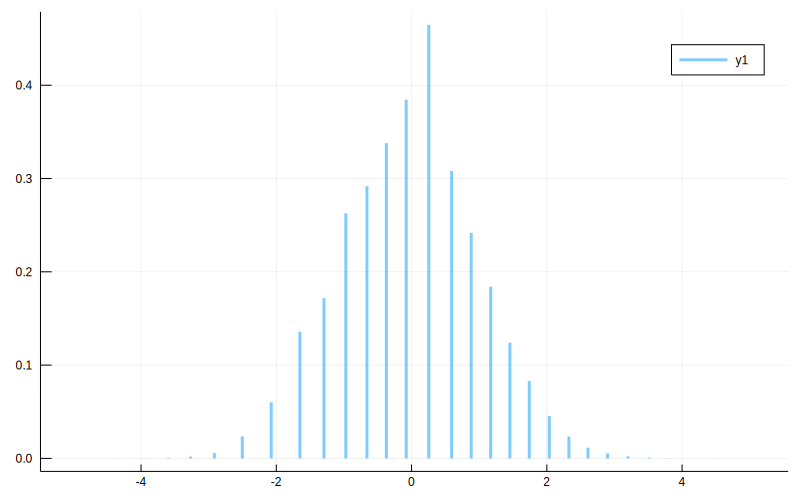

In [46]:
using Distributed
addprocs(3)
@everywhere using OnlineStats

o = @distributed merge for i in 1:3
    s = fit!(KHist(30), randn(10^6))
end

plot(o, seriestype=sticks, lw=3)